# ERA5
u10, v10 and pr from FROGs (at 1°x1°) because not available hourly

Use of Cartopy because I don't know how to make background with tpoplot

In [31]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tpoplot as plot # New plot library (https://tpoplot.readthedocs.io/en/latest/)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import os

In [2]:
# Define zone
latlim=(0,50)
lonlim=(45,120)

year = '2018'

## Compute and save the daily values of wind
[#Load-daily-wind](#Load-daily-wind)

In [21]:
# u10 = xr.open_mfdataset(
#     '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/'+year+'/u10.*.as1e5.GLOBAL_025.nc', 
#     combine='by_coords', parallel=True
# ).u10.sel(
#     latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1])
# ).resample(time='D').mean('time')
# u10.load()

<xarray.DataArray 'u10' (time: 365, latitude: 201, longitude: 301)>
array([[[-2.6106274 , -2.3595695 , -2.1366284 , ...,  2.0350838 ,
          2.042286  ,  2.0570564 ],
        [-2.6834629 , -2.420564  , -2.2085278 , ...,  1.9749031 ,
          2.0448902 ,  2.124602  ],
        [-2.67504   , -2.4808261 , -2.3329175 , ...,  2.157154  ,
          2.2011807 ,  2.2827644 ],
        ...,
        [-7.906241  , -7.6775627 , -7.4662995 , ...,  0.42656326,
          0.5144132 ,  0.59754306],
        [-7.6513176 , -7.430533  , -7.2043777 , ...,  0.55485916,
          1.1665941 ,  1.0975024 ],
        [-7.3905754 , -7.2231355 , -6.9917717 , ...,  0.58692294,
          1.4197273 ,  2.5917244 ]],

       [[-2.0571086 , -1.8664755 , -1.7174276 , ...,  2.50531   ,
          2.4476116 ,  2.378479  ],
        [-2.116679  , -1.9353638 , -1.8145956 , ...,  2.1952515 ,
          2.1259563 ,  2.1138306 ],
        [-2.1793416 , -2.0530396 , -1.9858602 , ...,  2.1694133 ,
          2.1355183 ,  2.2276814 ],
        ...,
        [-8.005229  , -7.802429  , -7.622294  , ...,  1.6921183 ,
          1.5347697 ,  0.7632039 ],
        [-7.820414  , -7.6304727 , -7.442444  , ...,  1.7708944 ,
          1.7862753 ,  1.171163  ],
        [-7.596171  , -7.4811807 , -7.2955527 , ...,  1.7796427 ,
          1.5607706 ,  2.21934   ]],

       [[-3.1338577 , -2.771146  , -2.5023067 , ...,  1.770195  ,
          1.65846   ,  1.6893438 ],
        [-3.123319  , -2.8037388 , -2.5840123 , ...,  1.8014857 ,
          1.7536341 ,  1.7888311 ],
        [-3.088651  , -2.882515  , -2.7544632 , ...,  2.191663  ,
          2.072441  ,  2.037244  ],
        ...,
        [-8.082588  , -7.939888  , -7.839424  , ..., -0.29242706,
          0.26649222, -0.26325226],
        [-7.909004  , -7.801338  , -7.7110467 , ..., -0.3967158 ,
          0.07598114, -0.3904902 ],
        [-7.7214227 , -7.689318  , -7.6122108 , ..., -0.55561066,
         -0.4846878 , -1.1636835 ]],

       ...,

       [[ 2.7446263 ,  2.6359432 ,  2.6947403 , ...,  2.2075984 ,
          2.2157772 ,  2.322548  ],
        [ 2.5680313 ,  2.4718807 ,  2.564125  , ...,  2.1448135 ,
          2.1579564 ,  2.2632625 ],
        [ 2.1623104 ,  2.163287  ,  2.2559788 , ...,  2.2362442 ,
          2.2495906 ,  2.4076717 ],
        ...,
        [-5.7850776 , -5.6748886 , -5.6220727 , ...,  1.4753393 ,
          0.75365955,  1.1583227 ],
        [-5.612877  , -5.50456   , -5.4076767 , ...,  1.9964575 ,
          1.6175512 ,  1.8303198 ],
        [-5.4183784 , -5.376508  , -5.261884  , ...,  2.2146785 ,
          2.0091527 ,  2.7695694 ]],

       [[-1.5865084 , -1.0393893 , -0.6211357 , ...,  1.6765938 ,
          1.7096748 ,  1.9333891 ],
        [-1.7079277 , -1.1912041 , -1.0033785 , ...,  1.710041  ,
          1.7003568 ,  1.9006335 ],
        [-1.7141126 , -1.4784762 , -1.2896742 , ...,  1.9018135 ,
          1.8920479 ,  2.0406888 ],
        ...,
        [-6.005413  , -5.923219  , -5.8635674 , ...,  0.8101794 ,
          0.63309604,  0.7127673 ],
        [-5.8488784 , -5.762249  , -5.662477  , ...,  1.4353828 ,
          1.1900622 ,  1.1681709 ],
        [-5.643963  , -5.620729  , -5.492311  , ...,  1.6953926 ,
          1.3747545 ,  1.20821   ]],

       [[-4.481153  , -3.7994716 , -3.3600998 , ...,  1.367602  ,
          1.4617182 ,  1.7000809 ],
        [-4.2566247 , -3.6063564 , -3.4343998 , ...,  1.6713129 ,
          1.6359125 ,  1.8560053 ],
        [-3.858879  , -3.7416916 , -3.5689213 , ...,  2.1738358 ,
          2.138354  ,  2.1525142 ],
        ...,
        [-6.1595383 , -6.0933356 , -6.0545983 , ..., -1.3055344 ,
         -0.52151746, -0.19021861],
        [-5.915642  , -5.8258796 , -5.7272468 , ..., -0.55463916,
          0.35808054,  0.51498157],
        [-5.644076  , -5.608513  , -5.480095  , ..., -0.08715057,
          0.48149362,  0.01770782]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * longitude  (longitude) float32 45.0 45.25 45.5 45.7

In [23]:
# u10.to_netcdf(
#     '/data/mlalande/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2018/u10.2018.as1e5.GLOBAL_025_daily.nc'
# )

# u10.to_netcdf(
#     'u10.2018.as1e5.GLOBAL_025_daily.nc'
# )

In [24]:
# v10 = xr.open_mfdataset(
#     '/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/'+year+'/v10.*.as1e5.GLOBAL_025.nc', 
#     combine='by_coords', parallel=True
# ).v10.sel(
#     latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1])
# ).resample(time='D').mean('time')
# v10.load()

<xarray.DataArray 'v10' (time: 365, latitude: 201, longitude: 301)>
array([[[ 7.9698306e-01,  5.7900620e-01,  4.3345770e-01, ...,
          6.1920804e-01,  5.4087955e-01,  3.2245508e-01],
        [ 7.4868393e-01,  5.6472397e-01,  4.5616278e-01, ...,
          8.1321841e-01,  6.6506577e-01,  4.5180893e-01],
        [ 7.6866275e-01,  6.2392807e-01,  5.4425687e-01, ...,
          1.0188255e+00,  9.5986557e-01,  8.7262601e-01],
        ...,
        [-4.5114074e+00, -4.8077126e+00, -5.0927467e+00, ...,
         -3.5600319e+00, -2.8784320e+00, -1.1833229e+00],
        [-4.6232238e+00, -4.9021544e+00, -5.1698546e+00, ...,
         -3.5022113e+00, -2.8973122e+00, -9.5342380e-01],
        [-4.7495255e+00, -5.0278459e+00, -5.2868385e+00, ...,
         -3.0367165e+00, -1.5388731e+00, -1.2057024e+00]],

       [[ 5.8134776e-01,  3.1669936e-01,  1.2492689e-01, ...,
         -1.4716715e+00, -1.3426024e+00, -1.1468830e+00],
        [ 2.4626477e-01,  4.4889450e-02, -9.2154823e-02, ...,
         -1.5012938e+00, -1.4866453e+00, -1.4272785e+00],
        [-2.5504431e-02, -1.8521309e-01, -2.9007149e-01, ...,
         -9.4941396e-01, -8.3877754e-01, -7.5804836e-01],
        ...,
        [-3.2715576e+00, -3.4992592e+00, -3.7103188e+00, ...,
          1.3619875e+00,  9.2086601e-01,  2.9309592e-04],
        [-3.4250813e+00, -3.6421630e+00, -3.8452880e+00, ...,
          1.0522137e+00,  1.7302258e-01, -2.6472154e-01],
        [-3.5845051e+00, -3.8104165e+00, -4.0140705e+00, ...,
          9.4344902e-01, -2.2606595e-01, -4.5258775e-01]],

       [[-8.9962453e-01, -1.3555164e+00, -1.7034575e+00, ...,
          1.5349865e+00,  1.5262381e+00,  1.3737316e+00],
        [-1.2489084e+00, -1.5992094e+00, -1.8412749e+00, ...,
          1.1715018e+00,  1.1446056e+00,  1.0328707e+00],
        [-1.5463530e+00, -1.8007883e+00, -1.9604969e+00, ...,
          1.0338064e+00,  1.1173025e+00,  1.1511160e+00],
        ...,
        [-4.6817288e+00, -4.8425364e+00, -4.9917874e+00, ...,
          3.3031526e-01,  2.7754021e-01,  2.2061475e-01],
        [-4.9293284e+00, -5.1020169e+00, -5.2581043e+00, ...,
          3.0545363e-01,  2.9735628e-01,  2.7237257e-01],
        [-5.1532459e+00, -5.3567777e+00, -5.5349193e+00, ...,
          1.3054530e-02,  2.6521111e-01,  6.1364049e-01]],

       ...,

       [[-2.0316982e+00, -1.7708340e+00, -1.7059332e+00, ...,
         -8.9965886e-01, -6.5242577e-01, -7.8149480e-01],
        [-1.8335781e+00, -1.5800787e+00, -1.4097906e+00, ...,
         -8.8997459e-01, -1.1513678e+00, -1.2866217e+00],
        [-1.6041673e+00, -1.3556728e+00, -1.1846523e+00, ...,
         -5.4801494e-01, -8.1022197e-01, -8.3821678e-01],
        ...,
        [-9.0682030e-01, -1.1386725e+00, -1.3766689e+00, ...,
          2.2217197e+00,  1.5753168e+00,  4.1332945e-01],
        [-1.0827236e+00, -1.2885342e+00, -1.4788011e+00, ...,
          2.2069085e+00,  2.8397560e-01, -5.7584697e-01],
        [-1.2418219e+00, -1.4112148e+00, -1.5941576e+00, ...,
          2.7739251e+00,  4.6643004e-01, -9.6354228e-01]],

       [[-2.3426692e+00, -2.1338069e+00, -2.2875748e+00, ...,
         -2.7931213e-02,  1.1008962e-01, -1.9256337e-01],
        [-2.2296321e+00, -2.0388362e+00, -2.0251644e+00, ...,
         -2.0359039e-01, -5.9869128e-01, -9.1281891e-01],
        [-2.0715511e+00, -1.9260432e+00, -1.9124933e+00, ...,
         -2.9595694e-01, -6.9268543e-01, -8.6622876e-01],
        ...,
        [-1.2356542e+00, -1.4962336e+00, -1.7772394e+00, ...,
          4.7678885e-01,  3.8755545e-01,  6.9887795e-02],
        [-1.4486262e+00, -1.6995621e+00, -1.9619318e+00, ...,
          3.7762704e-01, -5.6011707e-01, -6.6428375e-01],
        [-1.6920344e+00, -1.9168879e+00, -2.1681087e+00, ...,
          7.2625989e-01, -4.3068185e-01, -7.9339343e-01]],

       [[-6.0027057e-01, -1.0043640e+00, -1.4723816e+00, ...,
          1.5118307e+00,  1.4119772e+00,  1.1153463e+00],
        [-8.6882526e-01, -1.2588400e+00, -1.4294128e+00, ...,
          1.3770651e+00,  1.1997375e+00,  9.1433716e-01],
    

In [26]:
# v10.to_netcdf(
#     '/data/mlalande/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2018/v10.2018.as1e5.GLOBAL_025_daily.nc'
# )

# v10.to_netcdf(
#     'v10.2018.as1e5.GLOBAL_025_daily.nc'
# )

## Load daily wind

In [3]:
u10 = xr.open_dataarray(
    '/data/mlalande/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2018/u10.2018.as1e5.GLOBAL_025_daily.nc'
).load()

In [4]:
v10 = xr.open_dataarray(
    '/data/mlalande/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_SF/2018/v10.2018.as1e5.GLOBAL_025_daily.nc'
).load()

## Load precip

In [7]:
pr = xr.open_dataset(
    '/bdd/FROGs/1DD_V0/ERA5/pr_day_1x1_reanalysis_ERA5_'+year+'0101-'+year+'1231.nc'
).pr.sel(
    lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])
)
pr.load()

<xarray.DataArray 'pr' (time: 365, lat: 50, lon: 75)>
array([[[0.0000000e+00, 0.0000000e+00, 4.0535168e-03, ...,
         2.3319881e+01, 6.1343222e+00, 1.0363491e+01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.7723326e+01, 6.3383489e+00, 4.4615707e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         9.1433830e+00, 8.9609737e+00, 5.4992709e+00],
        ...,
        [3.0401376e-01, 1.4052191e-01, 9.7284406e-02, ...,
         5.5398062e-02, 3.0806729e-01, 6.5937203e-01],
        [9.2014831e-01, 1.2795602e+00, 3.2563251e-01, ...,
         5.9451580e-02, 1.1890316e-01, 3.1212080e-01],
        [1.3633327e+00, 1.1498476e+00, 1.8375942e-01, ...,
         8.2421504e-02, 9.3230888e-02, 1.9321764e-01]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         4.8952971e+00, 2.2564577e+01, 2.7384209e+01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         9.0798779e+00, 8.6380444e+00, 2.0499985e+01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.2170059e+01, 9.1636505e+00, 3.7927406e+00],
        ...,
        [1.8105708e-01, 1.1755199e-01, 4.7291029e-02, ...,
         1.4727779e-01, 3.5400712e-01, 1.3646839e+00],
        [4.9993373e-02, 4.8642203e-02, 2.0402703e-01, ...,
         1.6214067e-02, 4.8642203e-02, 2.6618093e-01],
        [1.8916413e-02, 1.4862895e-02, 1.8916413e-02, ...,
         5.4046889e-03, 1.0809378e-02, 5.1344547e-02]],

       [[0.0000000e+00, 0.0000000e+00, 2.7023444e-03, ...,
         1.5376340e+01, 5.5438595e+00, 5.0668960e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         8.5542717e+00, 9.5622463e+00, 7.3733468e+00],
        [0.0000000e+00, 1.3511722e-03, 0.0000000e+00, ...,
         8.2435026e+00, 5.0723009e+00, 2.3713074e+00],
        ...,
        [4.0535168e-03, 5.4046889e-03, 1.3511722e-03, ...,
         0.0000000e+00, 1.6214067e-02, 1.3646840e-01],
        [8.1070336e-03, 5.4046889e-03, 1.8916413e-02, ...,
         0.0000000e+00, 1.3511722e-03, 8.1070336e-03],
        [2.7023444e-03, 0.0000000e+00, 8.1070336e-03, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       ...,

       [[8.2421504e-02, 1.2025432e-01, 2.2969928e-01, ...,
         3.9670417e+00, 8.0840635e+00, 7.2287714e-01],
        [6.6207439e-02, 1.4457543e-01, 1.2701020e-01, ...,
         9.1177101e+00, 5.8978672e+00, 2.5942507e+00],
        [1.8916412e-01, 2.2699694e-01, 2.1348523e-01, ...,
         1.3433354e+01, 2.8521896e+01, 1.3205007e+01],
        ...,
        [9.6473700e-01, 5.2425486e-01, 2.4861568e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.3241488e-01, 1.2836136e-01, 2.2699694e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.0809378e-01, 1.3241488e-01, 1.0944495e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[8.6475022e-02, 1.7835474e-01, 2.9725790e-01, ...,
         1.3804927e+01, 3.5765529e+00, 4.0629749e+00],
        [4.3237511e-02, 1.2025432e-01, 7.2963305e-02, ...,
         9.4717178e+00, 5.2168760e+00, 4.9898791e+00],
        [2.0267583e-02, 1.3241488e-01, 5.1344547e-02, ...,
         9.3582191e+00, 1.5033142e+01, 9.4392891e+00],
        ...,
        [3.3279371e+00, 3.0522981e+00, 2.8131406e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [3.0806729e-01, 1.5943833e-01, 1.1484965e-01, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [4.0535167e-02, 2.5672272e-02, 4.9993373e-02, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.3511722e-03, 1.0809378e-02, 4.9993373e-02, ...,
         9.9108486e+00, 4.9196181e+00, 5.4317123e-01],
        [4.0535168e-03, 3.1076964e-02, 9.3230881e-02, ...,
         8.7907267e+00, 1.5469571e+01, 5.0533843e+00],
        [2.7023444e-03, 9.7284399e-02, 8.3772689e-02, ...,
         1.4168393e+01, 6.2761950e+00, 2.7712543e+00],
        ...,
        [5.7195125e+00, 2.6658630e+00, 3.4130611e+00, ...,
         0.0000000e+00, 

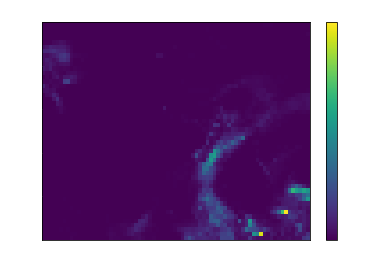

In [15]:
pr[1].plot()

## Make a new colorbar (with shading)
https://stackoverflow.com/questions/51601272/python-matplotlib-heatmap-colorbar-from-transparent

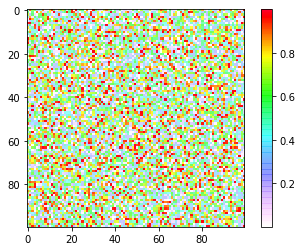

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('gist_rainbow_r')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

# show some example data
f,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='rainbow_alpha')
plt.colorbar(mappable=h)

## Make plot
- tpoblem with the background image (not good resolution): https://gis.stackexchange.com/questions/313490/increasing-resolution-of-cartopy-stock-background
- Possible better solution: http://earthpy.org/tag/cartopy.html

In [9]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/data/mlalande/PYTHON/cartopy/BG"

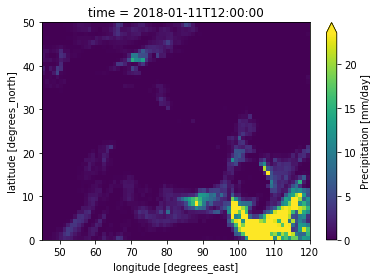

In [21]:
background = 1
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color

pr[i].plot(robust=True)

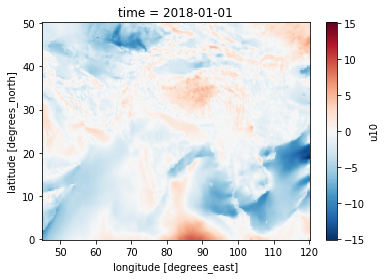

In [24]:
u10[0].plot()

In [29]:
u10.longitude

<xarray.DataArray 'longitude' (longitude: 301)>
array([ 45.  ,  45.25,  45.5 , ..., 119.5 , 119.75, 120.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 45.0 45.25 45.5 45.75 ... 119.5 119.75 120.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [27]:
pr.lon

<xarray.DataArray 'lon' (lon: 75)>
array([ 45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,  54.5,
        55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,  63.5,  64.5,
        65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,  72.5,  73.5,  74.5,
        75.5,  76.5,  77.5,  78.5,  79.5,  80.5,  81.5,  82.5,  83.5,  84.5,
        85.5,  86.5,  87.5,  88.5,  89.5,  90.5,  91.5,  92.5,  93.5,  94.5,
        95.5,  96.5,  97.5,  98.5,  99.5, 100.5, 101.5, 102.5, 103.5, 104.5,
       105.5, 106.5, 107.5, 108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5,
       115.5, 116.5, 117.5, 118.5, 119.5])
Coordinates:
  * lon      (lon) float64 45.5 46.5 47.5 48.5 49.5 ... 116.5 117.5 118.5 119.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [35]:
# Sans le regrid ne se positionne pas bien...
regridder = xe.Regridder(
    pr, u10.rename({'longitude': 'lon', 'latitude': 'lat'}), 'bilinear', reuse_weights=True
)
pr_regrid = regridder(pr)
pr_regrid

Create weight file: bilinear_50x75_201x301.nc


<xarray.DataArray 'pr' (time: 365, lat: 201, lon: 301)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.36333275e+00, ...,
         1.93217635e-01, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.03634911e+01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.89164132e-02, ...,
         5.13445474e-02, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.73842087e+01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.70234444e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.06689596e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       ...,

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.08093783e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 8.24215040e-02, ...,
         7.22877145e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 4.05351669e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 8.64750221e-02, ...,
         4.06297493e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000

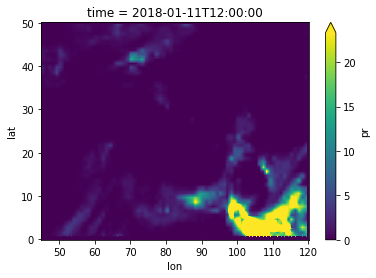

In [65]:
background = 1
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color

pr_regrid[i].plot(robust=True)

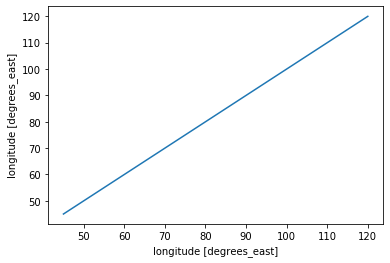

In [66]:
u10.longitude.plot()

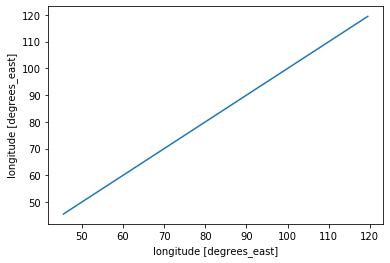

In [67]:
pr.lon.plot()

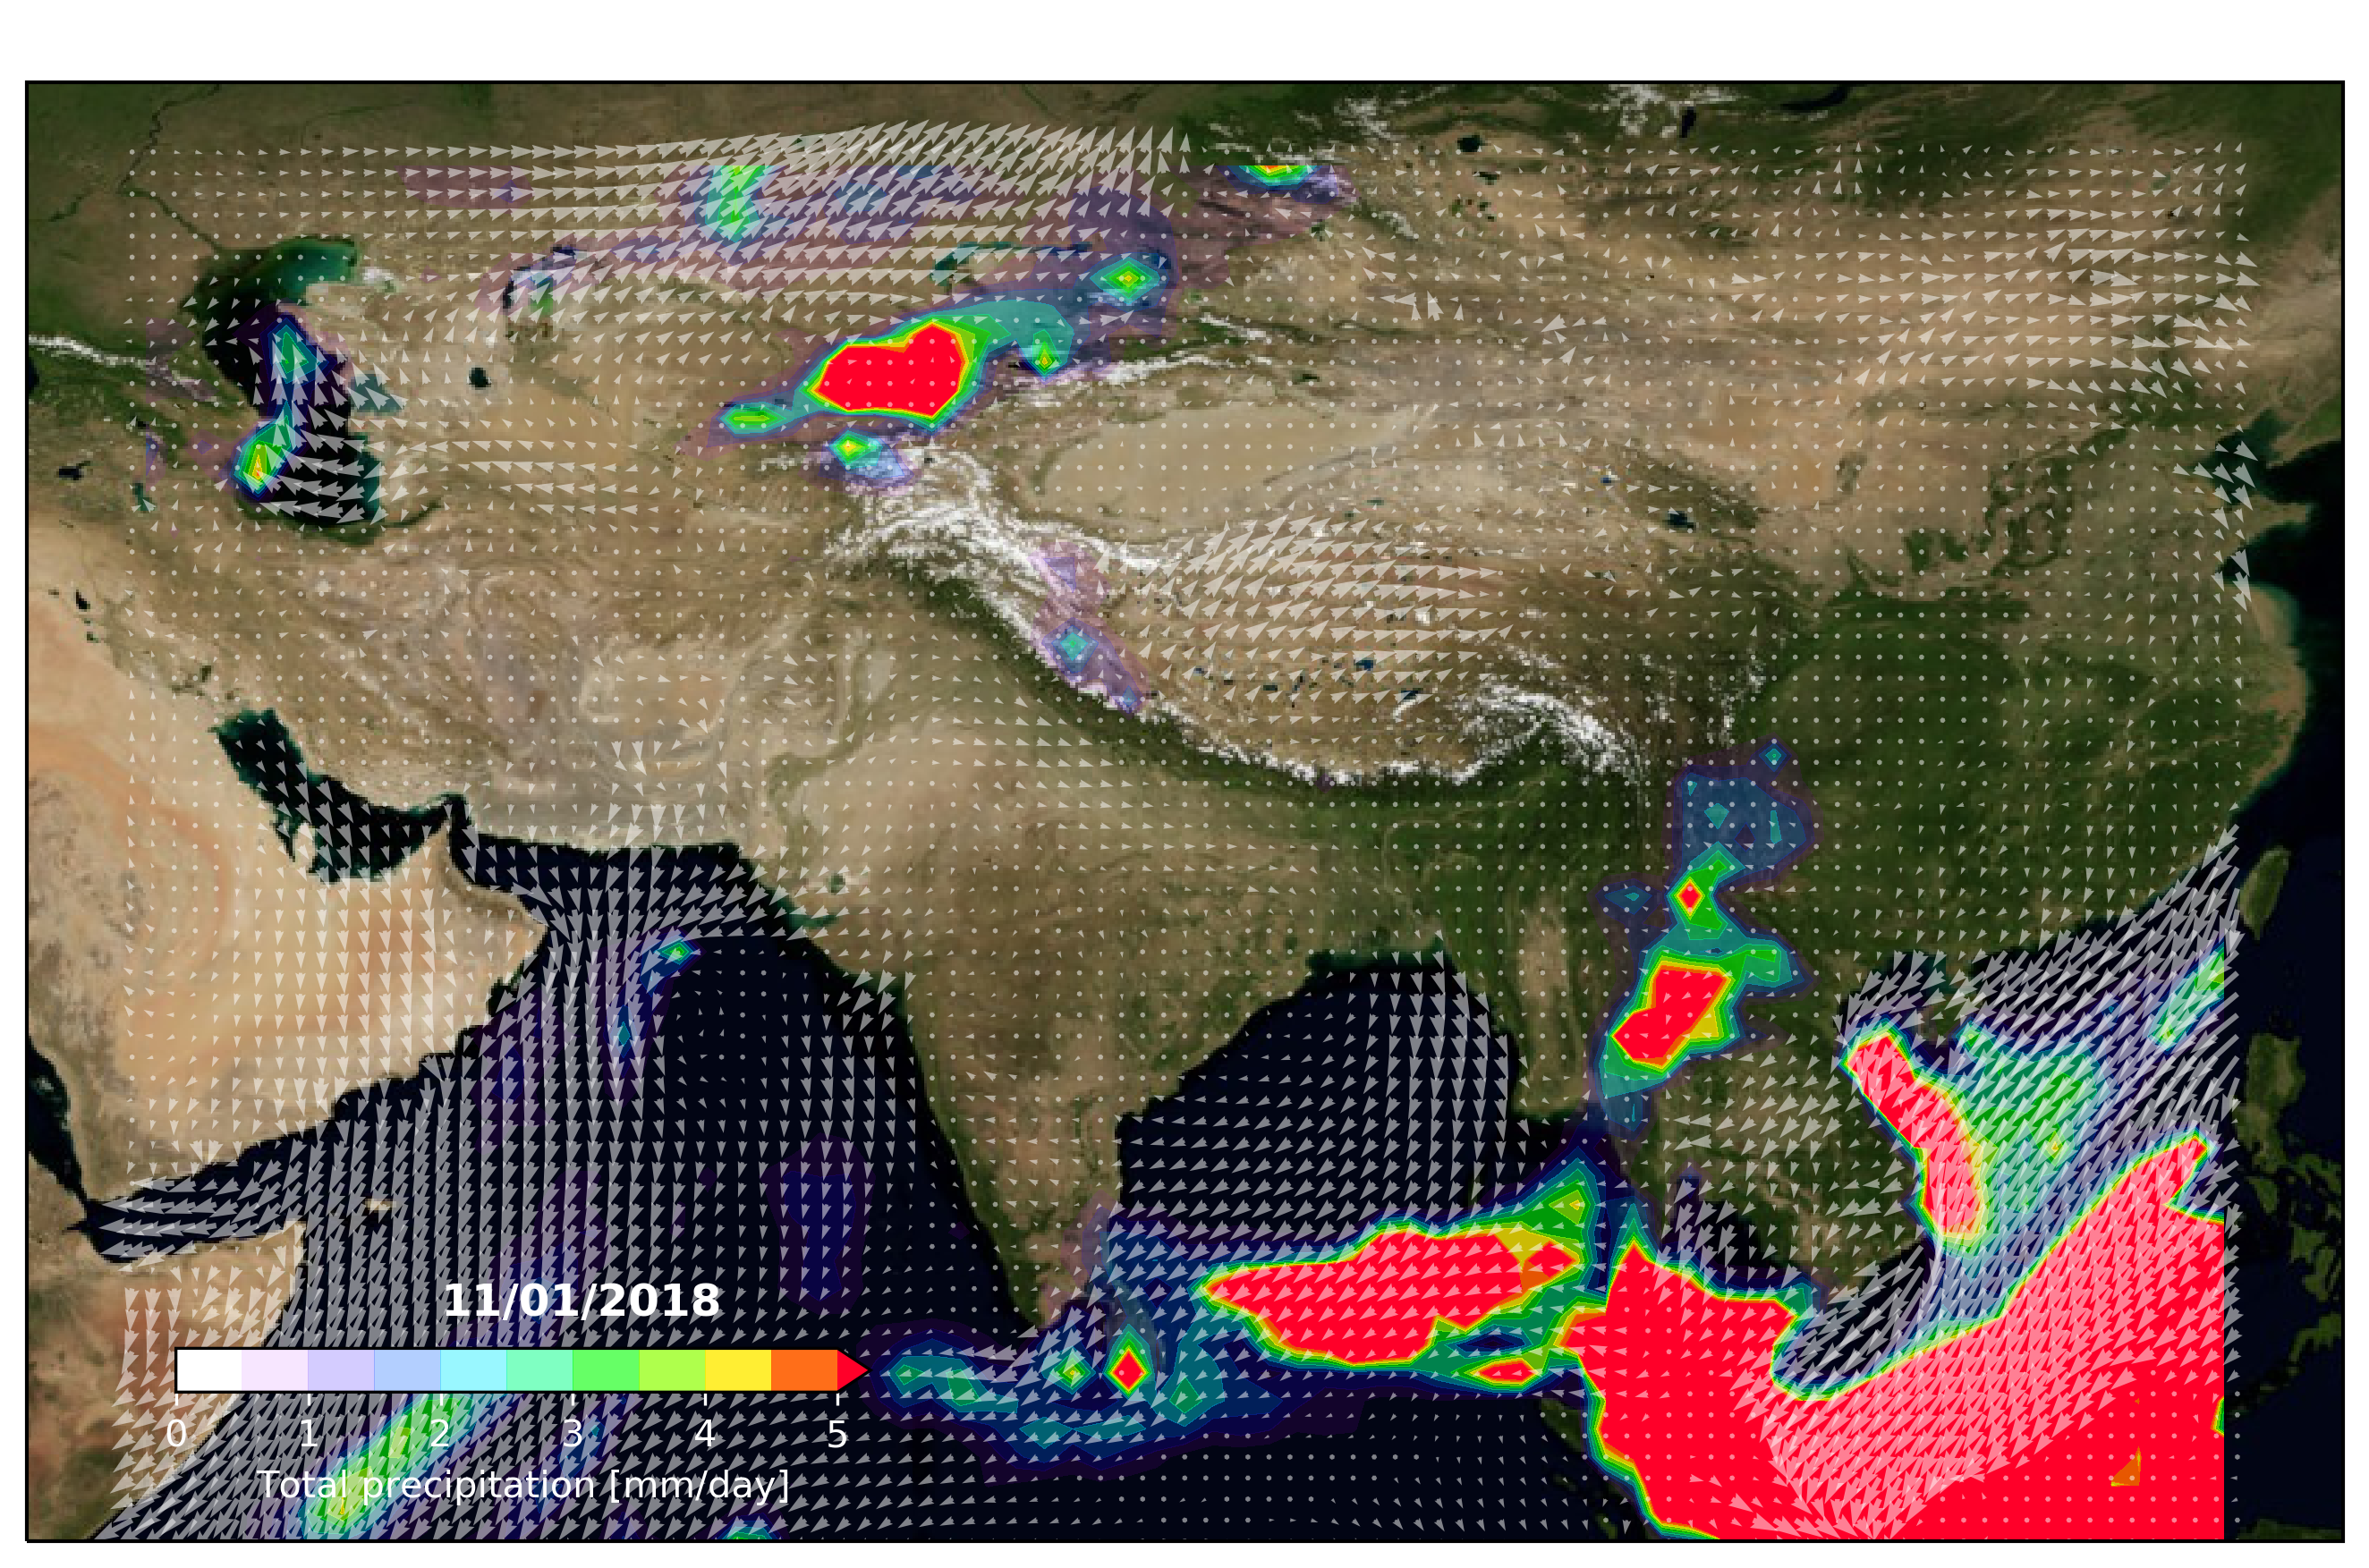

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i = 10

# To make white text
# https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
background = 0
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color


dpi = 300
# dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
# ax.stock_img()
ax.background_img(name='BM', resolution='high')


# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
# m = ax.contourf(pr[i], cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max')
m = pr[i].plot.contourf(cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max', add_colorbar=False)

# Add the winds
k = 3 # don't take all
ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

# Put the colorbar inside the figure
# https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
cbaxes = inset_axes(ax, width="30%", height="3%", loc="lower left", borderpad=4) 
fig.colorbar(m, cax=cbaxes, orientation='horizontal', label="Total precipitation [mm/day]")

# Add the date
ax.text(61, 9, str(pr[i].time.dt.strftime('%d/%m/%Y').values), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold'
        )

# plt.savefig('test.png', dpi=dpi, bbox_inches='tight')

plt.show()

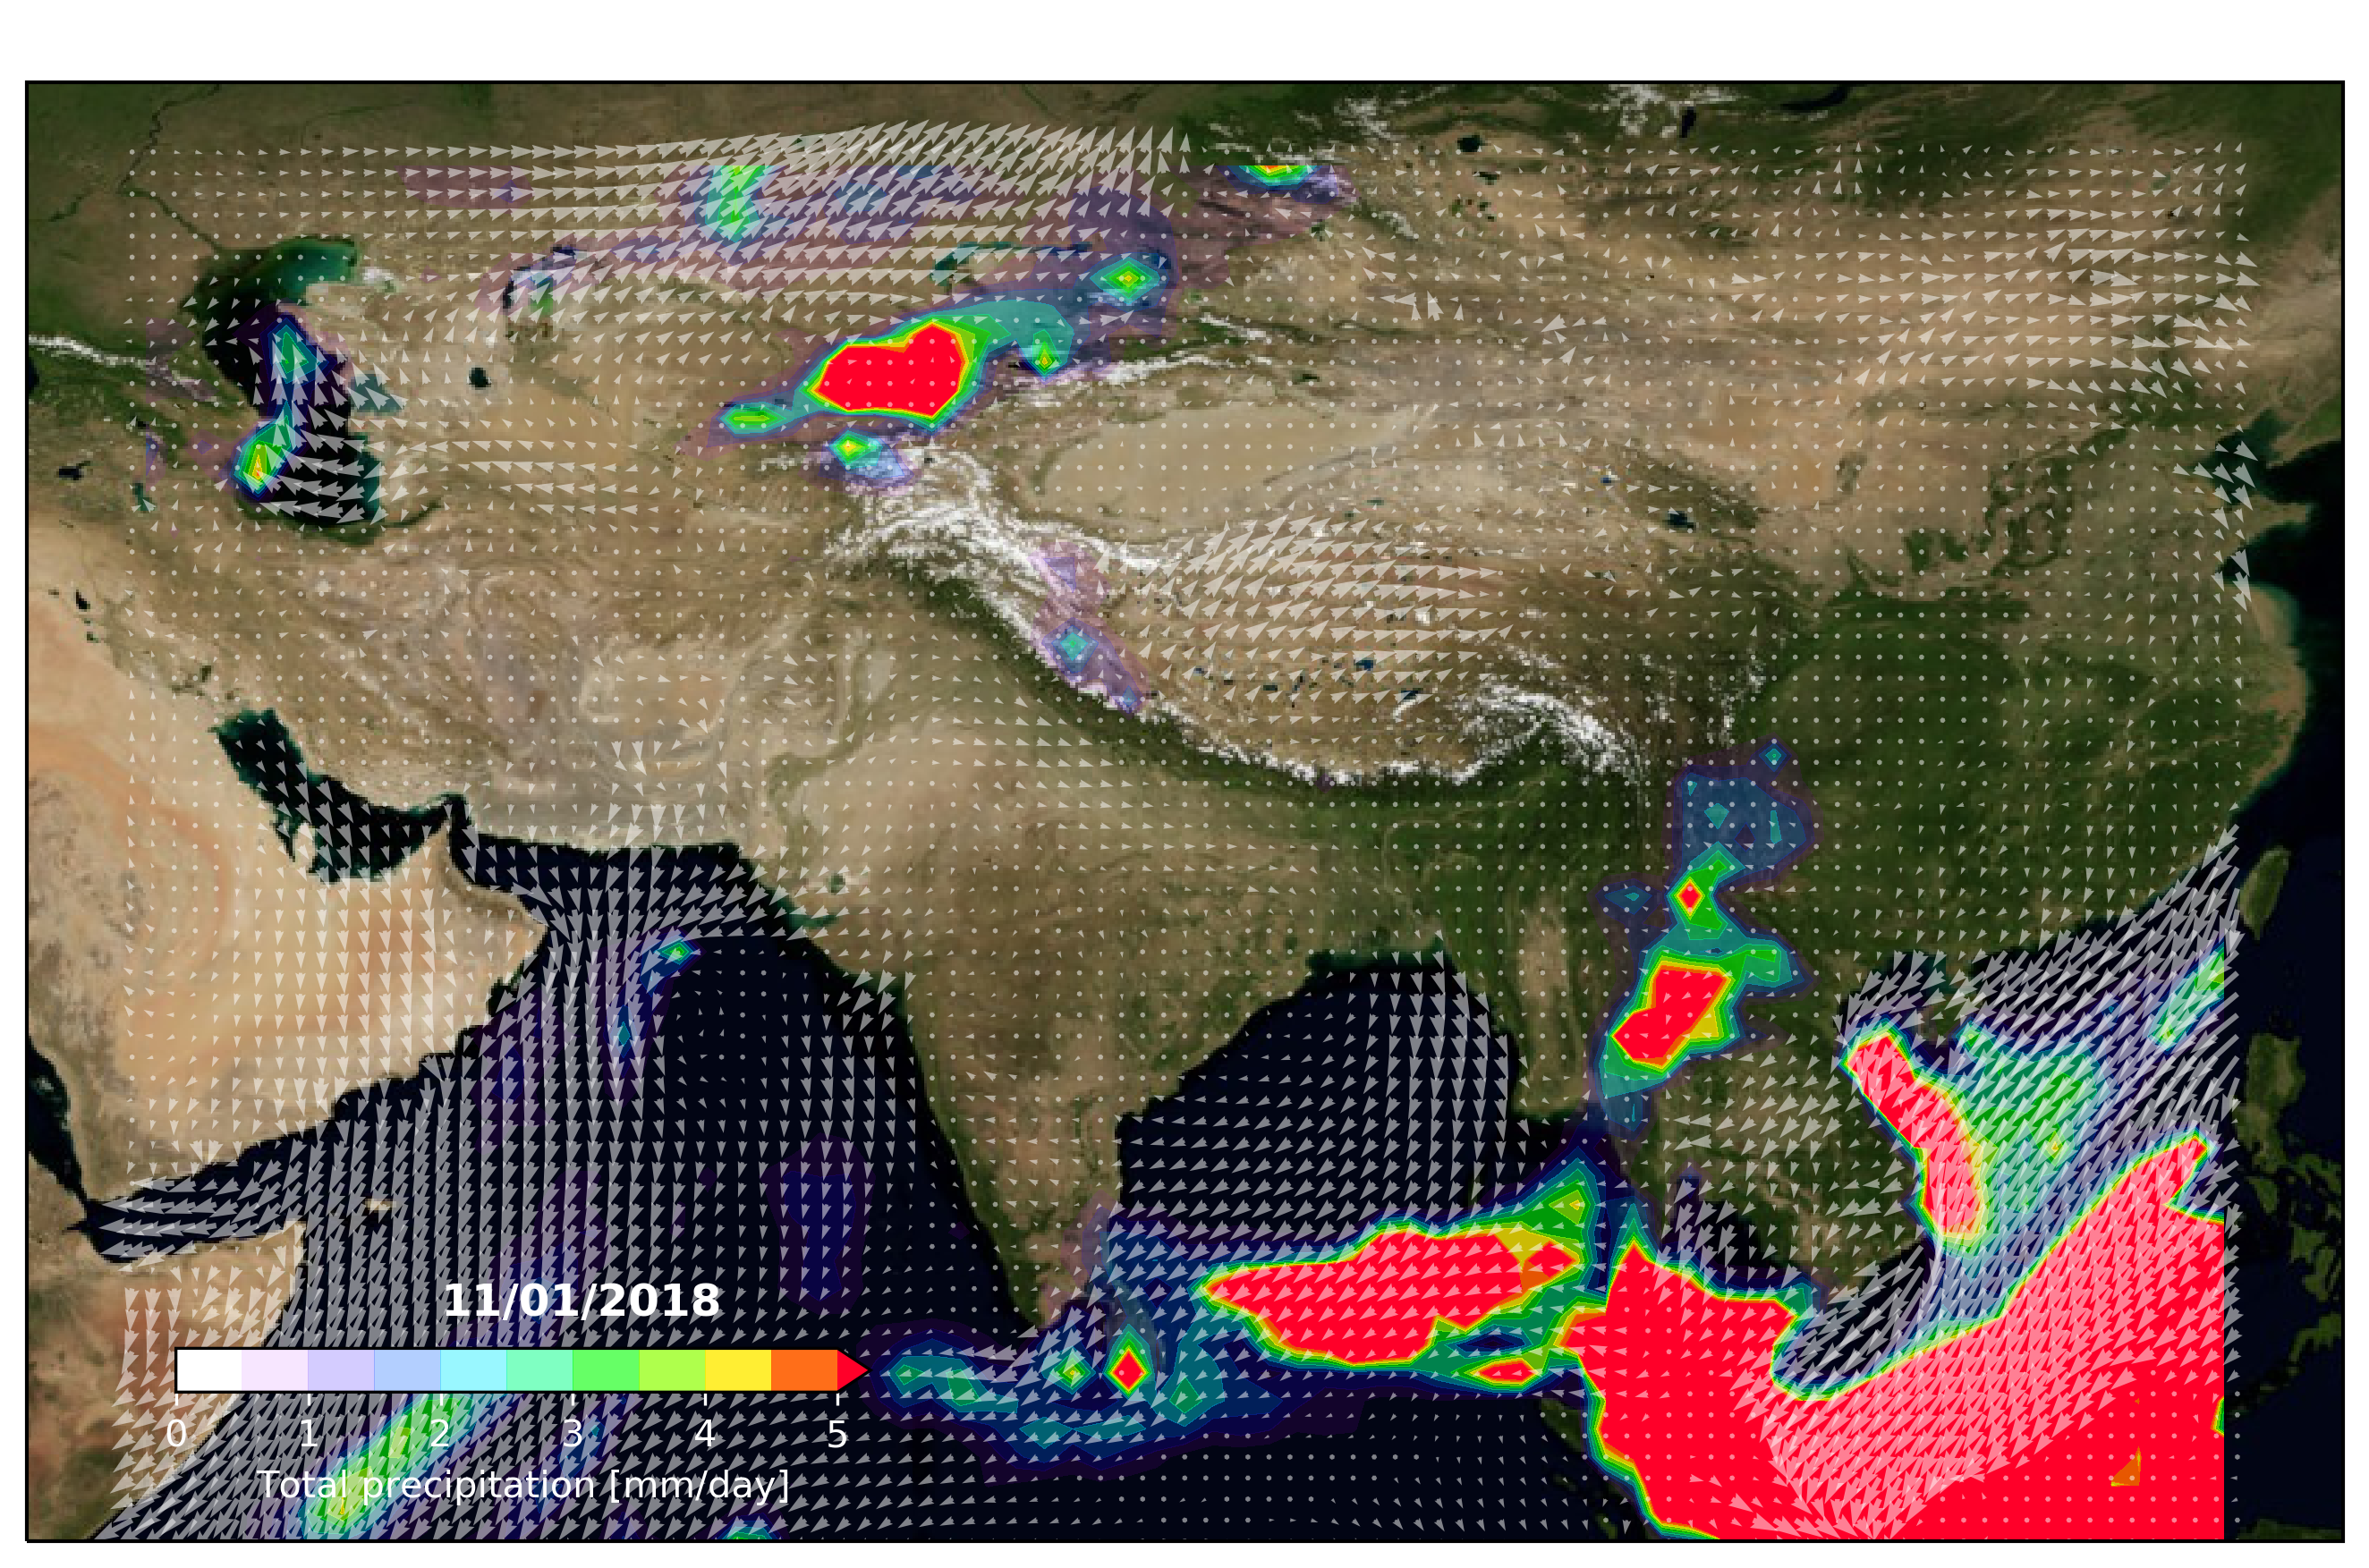

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i = 10

# To make white text
# https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
background = 0
if background == 0:
    back_color='black'
    fore_color='white'
else:
    back_color='white'
    fore_color='black'

plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color


dpi = 300
# dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
# ax.stock_img()
ax.background_img(name='BM', resolution='high')


# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
# m = ax.contourf(pr[i], cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max')
m = pr[i].plot.contourf(cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max', add_colorbar=False)

# Add the winds
k = 3 # don't take all
ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

# Put the colorbar inside the figure
# https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
cbaxes = inset_axes(ax, width="30%", height="3%", loc="lower left", borderpad=4) 
fig.colorbar(m, cax=cbaxes, orientation='horizontal', label="Total precipitation [mm/day]")

# Add the date
ax.text(61, 9, str(pr[i].time.dt.strftime('%d/%m/%Y').values), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold'
        )

# plt.savefig('test.png', dpi=dpi, bbox_inches='tight')

plt.show()

## Save images
Try to save without displaying image: 
https://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython

Not the first solution but the second

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

for i in range(30,91):
    print(i)
    # To make white text
    # https://stackoverflow.com/questions/47906119/matplotlib-colorbar-minor-ticks-color-and-number-of-minor-ticks?rq=1
    background = 0
    if background == 0:
        back_color='black'
        fore_color='white'
    else:
        back_color='white'
        fore_color='black'

    plt.rcParams["text.color"] = fore_color
    plt.rcParams["axes.labelcolor"] = fore_color
    plt.rcParams["xtick.color"] =  fore_color
    plt.rcParams["ytick.color"] = fore_color


    dpi = 300
    # dpi: https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
#     fig = plt.figure(figsize=(1920/dpi, 1080/dpi), dpi=dpi) # Full HD
    fig = plt.figure(figsize=(3840/dpi, 2160/dpi), dpi=dpi) # 4K not really because of the bbox_inches='tight'

    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

    # Add background image
    # ax.stock_img()
    ax.background_img(name='BM', resolution='high')


    # Add the tpecip
    # tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')
    m = ax.contourf(tp[i], cmap='rainbow_alpha', levels=np.arange(0,5.5,0.5), extend='max')

    # Add the winds
    k = 2 # don't take all
    ax.quiver(u10.longitude[::k], u10.latitude[::k], u10[i,::k,::k], v10[i,::k,::k], alpha=0.5, color='white')

    # Put the colorbar inside the figure
    # https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure
    cbaxes = inset_axes(ax, width="30%", height="3%", loc="lower left", borderpad=4) 
    fig.colorbar(m, cax=cbaxes, orientation='horizontal', label="Total precipitation [mm]")

    # Add the date
    ax.text(61, 9, str(tp[i].time.dt.strftime('%d/%m/%Y %H:%M').values), 
             horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold'
            )

    plt.savefig('img/ERA5/IMG_'+str(i).zfill(4)+'.png', dpi=dpi, bbox_inches='tight')

    plt.close(fig)

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


## Make video
https://stackoverflow.com/questions/22965569/convert-from-jpg-to-mp4-by-ffmpeg

I didn't succed with FuncAnimation from matplotlib :https://courspython.com/animation-matplotlib.html

For slowing down: https://trac.ffmpeg.org/wiki/How%20to%20speed%20up%20/%20slow%20down%20a%20video

In [13]:
ffmpeg -f image2 -i img/ERA5/IMG_%4d.png -filter:v "setpts=2.0*PTS" ERA5_animation.mp4

/bin/sh: ffmpeg : commande introuvable
